abrimos el json


In [12]:
# Con estas 2 lineas recargamos automaticamente todos los archivos afiliados al proyecto, sin necesidad de usar el boton de Restart
%load_ext autoreload
%autoreload 2

from modules.open_json import open_json
import folium
 
jsons = list(open_json("../json/mypimes.json"))
geojson = open_json("../json/lha.geojson")
canasta_basica = open_json("../json/canasta_basica.json")
revolico = list(open_json("../json/revolico.json "))

provincia_map = folium.Map(location=(23.133865,-82.3585654))

for i in range(len(jsons)):
        
    folium.Marker(
        location=[jsons[i]["ubicacion"]["lat"], jsons[i]["ubicacion"]["long"]],
        tooltip=f"{jsons[i]["nombre"]}",
        popup= f"<h1>Municipio: {jsons[i]["municipio"]}✅  Horario: {jsons[i]["horario"]} ⏰</h1>",
        icon=folium.Icon(icon="shopping-cart", color="blue")
    ).add_to(provincia_map)
    
folium.GeoJson(geojson,
               style_function= lambda x: {
                   "fillColor": "#93FF69",
                   "color": "#08CB00"
               }
               ).add_to(provincia_map)
folium
    
provincia_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:

from modules.graphs import porciento
import matplotlib.pyplot as plt

m_productos = []

for productos in jsons:
    m_productos = productos["productos"]
    
r_productos = []

for productos in revolico:
    r_productos = productos["productos"]


cb_productos = canasta_basica["productos"]

union = m_productos + r_productos




porciento de bebidas nacionalaes e internacionales que mas se comercializan

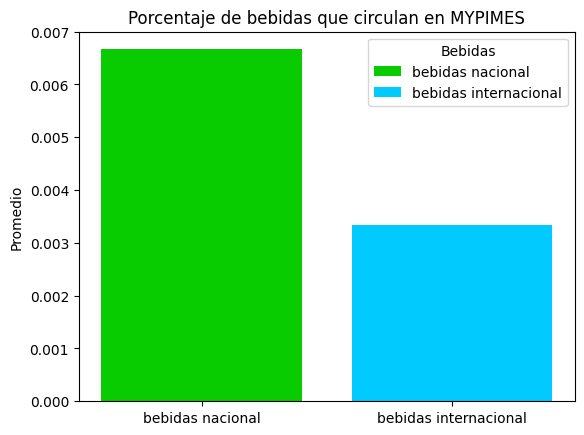

In [14]:
bebida_nacional = []
bebida_internacional = []

for marcas_nacional in m_productos:
    if marcas_nacional["tipo"] == "bebida":
        
        if marcas_nacional["nacional"] == True:
            bebida_nacional.append(marcas_nacional)
            
        if marcas_nacional["nacional"] == False:            
            bebida_internacional.append(marcas_nacional)

porciento_nacional= porciento(total=len(bebida_internacional) + len(bebida_nacional), parte= len(bebida_nacional))/ 100
porciento_internacional = porciento(total=len(bebida_internacional) + len(bebida_nacional), parte= len(bebida_internacional))/ 100


fig , ax = plt.subplots()

ax.bar(["bebidas nacional", "bebidas internacional"],[porciento_internacional, porciento_nacional], label=["bebidas nacional", "bebidas internacional"], color= ["#08CB00", "#00CAFF"])
ax.set_ylabel("Promedio")
ax.legend(title='Bebidas')
ax.set_title("Porcentaje de bebidas que circulan en MYPIMES")
plt.show()      
        

marcas que mas se comercializan

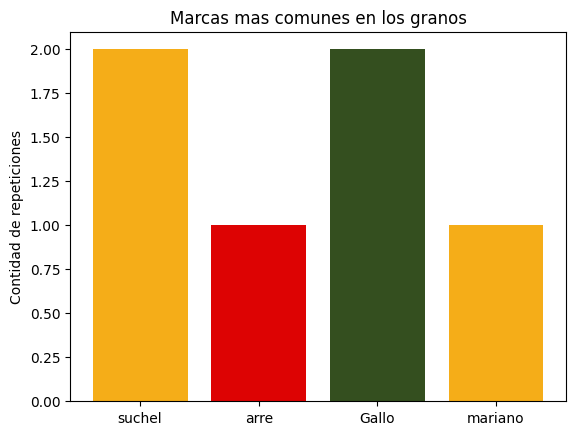

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

marcas_granos = []

for elementos in union:
    if elementos.get("tipo") == "granos":
        marcas_granos.append(elementos.get("marca"))

contador_marcas = Counter(marcas_granos)


lista_valores = list(contador_marcas.values())
lista_valores

fig = plt.bar(list(contador_marcas.keys()), height= lista_valores, color= ["#F5AD18", "#DD0303", "#344F1F"])

plt.title("Marcas mas comunes en los granos")

plt.ylabel("Contidad de repeticiones")
plt.show()


entre las marcas mas comunes como varian los precios 
en la grafica de arriba 


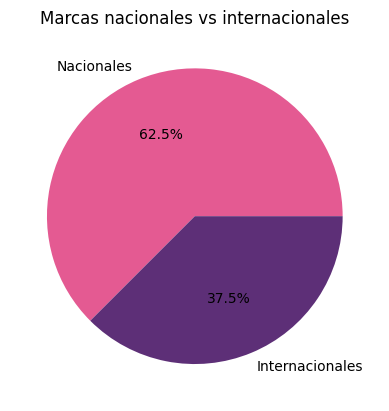

In [16]:
from modules.graphs import porcentaje

porcentaje(m_productos)

In [17]:
salario_minimo = 2100
salario_medio = 6506.5

print(canasta_basica)
print(m_productos)

{'productos': [{'nombre': 'arroz_nacional', 'precio_cup': 2.5}, {'nombre': 'arroz_importado(15%particulas)', 'precio_cup': 7.0}, {'nombre': 'arroz_importado(4%particulas)', 'precio_cup': 3.2}, {'nombre': 'frijoles_negros_nacionales', 'precio_cup': 1.8}, {'nombre': 'frijol_imoportado', 'precio_cup': 1.4}, {'nombre': 'frijoles_colorados_nacionales', 'precio_cup': 5.2}, {'nombre': 'aceite_vegetal', 'precio_cup': 1.8}, {'nombre': 'aceite_vegetal_soya', 'precio_cup': 2.3}, {'nombre': 'azucar_refino', 'precio_cup': 5.8}, {'nombre': 'azucar_crudo', 'precio_cup': 2.3}, {'nombre': 'cafe_mezclado', 'precio_cup': 4.1}, {'nombre': 'sal_comun', 'precio_cup': 1.2}, {'nombre': 'fideos', 'precio_cup': 7.8}, {'nombre': 'leche', 'precio_cup': 0.25}, {'nombre': 'leche_polvo', 'precio_cup': 2.5}, {'nombre': 'pan', 'precio_cup': 1.2}, {'nombre': 'keroseno', 'precio_cup': 2.0}, {'nombre': 'alcohol', 'precio_cup': 5.2}], 'productos_de_limpieza': [{'nombre': 'jabÃ³n', 'precio_cup': 0.5}, {'nombre': 'jabÃ³n_de

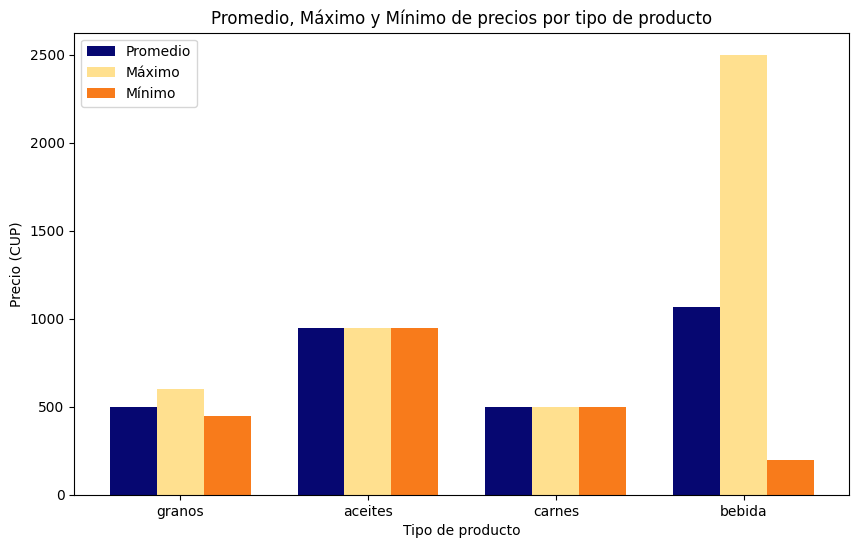

In [18]:
from modules.graphs import promedio
from modules.graphs import pmm

precios_por_tipo = {}

for prod in m_productos:
    precio = prod.get("precio_cup")
    tipo = prod.get("tipo")

    if tipo not in precios_por_tipo:
        precios_por_tipo[tipo] = [] 

    precios_por_tipo[tipo].append(precio)

resultados = {}

for tipo, lista_precios in precios_por_tipo.items():
    resultados[tipo] = {
        "promedio": promedio(lista_precios),
        "maximo": max(lista_precios),
        "minimo": min(lista_precios)
    }

tipos = list(resultados.keys())
promedios = [resultados[t]["promedio"] for t in tipos]
maximos = [resultados[t]["maximo"] for t in tipos]
minimos = [resultados[t]["minimo"] for t in tipos]

pmm(tipos, promedios, maximos, minimos)
